## Data Loading and Inspection

Importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Loading the historic and year-to-date datasets into dataframes for further analyses.

In [2]:
historic_data_url = 'https://data.cityofnewyork.us/api/views/8h9b-rp9u/rows.csv?accessType=DOWNLOAD'
ytd_data_url = 'https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv?accessType=DOWNLOAD'


historic_df = pd.read_csv(historic_data_url)
ytd_df = pd.read_csv(ytd_data_url)

Inspecting the datasets to understand their structure.

In [3]:
print("NYPD Arrests Historic Data:")
print(historic_df.head())
print(historic_df.info())

print("\nNYPD Arrests Year to Date Data:")
print(ytd_df.head())
print(ytd_df.info())

NYPD Arrests Historic Data:
   ARREST_KEY ARREST_DATE  PD_CD       PD_DESC  KY_CD   OFNS_DESC    LAW_CODE  \
0   220756993  11/19/2020  155.0        RAPE 2  104.0        RAPE  PL 1303001   
1   221995093  12/18/2020  177.0  SEXUAL ABUSE  116.0  SEX CRIMES  PL 1306503   
2   221558560  12/09/2020  157.0        RAPE 1  104.0        RAPE  PL 1303501   
3   217890363  09/15/2020    NaN           NaN    NaN         NaN  PL 2650022   
4   219517698  10/21/2020  153.0        RAPE 3  104.0        RAPE  PL 1302502   

  LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP  \
0          F           B               41                0.0     18-24   
1          F           K               84                0.0     45-64   
2          F           S              120                0.0       <18   
3          M           B               44                0.0     25-44   
4          F           Q              112                0.0     25-44   

  PERP_SEX       PERP_RACE  X_COORD_CD  

## Data Cleaning and Handling Missing Values

Ensuring the ARREST_DATE columns in both dataframes are in a consistent datetime format.



In [4]:
historic_df['ARREST_DATE'] = pd.to_datetime(historic_df['ARREST_DATE'], errors='coerce')
ytd_df['ARREST_DATE'] = pd.to_datetime(ytd_df['ARREST_DATE'], errors='coerce')

Since we're focusing on data from 2019 to 2024, filtering both datasets to include arrests from 2019-2024 only.



In [5]:
historic_df = historic_df[(historic_df['ARREST_DATE'] >= '2019-01-01') & (historic_df['ARREST_DATE'] <= '2024-12-31')]
ytd_df = ytd_df[(ytd_df['ARREST_DATE'] >= '2019-01-01') & (ytd_df['ARREST_DATE'] <= '2024-12-31')]

The 'Lon_Lat' column in historic data and 'New Georeferenced Column' in year-to-date data are essentially the same. We'll rename the latter to match 'Lon_Lat' for consistency and to avoid loss of data when combining the two dataframes.

In [6]:
ytd_df.rename(columns={'New Georeferenced Column': 'Lon_Lat'}, inplace=True)

Combining the historic and year-to-date arrests into a single dataframe for a unified analysis for the years 2019-2024.

In [7]:
arrests_df = pd.concat([historic_df, ytd_df])

Checking for the number of missing values in the dataframe.

In [8]:
missing_values = arrests_df.isnull().sum()
print(missing_values[missing_values > 0])

PD_CD          660
PD_DESC        299
KY_CD          901
OFNS_DESC      299
LAW_CAT_CD    8267
dtype: int64


Viewing the pattern of missing data in order to decide how to handle null values.

In [9]:
arrests_df[arrests_df.isnull().any(axis=1)]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
3,217890363,2020-09-15,NaN,NaN,NaN,NaN,PL 2650022,M,B,44,0.0,25-44,M,BLACK,1009412.0,245306.0,40.839956,-73.909065,POINT (-73.90906496999997 40.83995593800007)
12,212465831,2020-04-28,777.0,NaN,NaN,NaN,PL 1950200,F,K,75,2.0,45-64,M,BLACK HISPANIC,1016409.0,178125.0,40.655538,-73.884099,POINT (-73.88409879299998 40.65553848200005)
22,193203736,2019-02-05,777.0,NaN,NaN,NaN,PL 1950200,F,M,1,0.0,18-24,F,WHITE,982351.0,201758.0,40.720464,-74.006852,POINT (-74.00685220399998 40.720463840000036)
23,195191904,2019-03-26,440.0,NaN,NaN,NaN,PL 1553502,F,M,10,0.0,18-24,M,ASIAN / PACIFIC ISLANDER,983821.0,213359.0,40.752306,-74.001550,POINT (-74.00154983299996 40.75230591800005)
39,195483860,2019-04-02,440.0,NaN,NaN,NaN,PL 1553502,F,M,18,0.0,18-24,M,WHITE,991531.0,217373.0,40.763320,-73.973718,POINT (-73.97371790399995 40.763320339000074)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127514,288687351,2024-06-18,35.0,NYS UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000035,NaN,M,1,0.0,25-44,M,BLACK,982761.0,204594.0,40.728241,-74.005370,POINT (-74.00537 40.728241)
128330,288286007,2024-06-10,NaN,(null),NaN,(null),(null),(null),M,18,0.0,25-44,M,WHITE,990156.0,215710.0,40.758751,-73.978681,POINT (-73.978681 40.758751)
128360,289019317,2024-06-24,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,Q,102,0.0,45-64,M,WHITE HISPANIC,1031164.0,199399.0,40.713859,-73.830768,POINT (-73.830768 40.713859)
128453,289071418,2024-06-25,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,M,34,0.0,25-44,M,WHITE HISPANIC,1002893.0,249674.0,40.851955,-73.932611,POINT (-73.932611 40.851955)


In [10]:
# Check the percentage of missing values
missing_percentage = arrests_df[['PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CAT_CD' ]].isnull().mean() * 100
print(missing_percentage)

PD_CD         0.062502
PD_DESC       0.028315
KY_CD         0.085325
OFNS_DESC     0.028315
LAW_CAT_CD    0.782889
dtype: float64


I observed that PD_CD, PD_DESC, KY_CD, and OFNS_DESC have missing values, often occurring together, but they constitute a small proportion of the dataset (less than 0.1%). Since these fields are crucial for understanding the nature of arrests, I'll drop these rows to ensure data quality for this assignment. In a real-world setting, we might explore reasons for these missing values or use imputation methods to retain as much data as possible.

In [11]:
arrests_df = arrests_df.dropna(subset=['PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC'])

The LAW_CAT_CD column represents the level of offense as categorized by the NYPD.

*   M for 'Misdemeanor'
*   F for 'Felony'
*   V for 'Violation'
*   I for 'Infraction'
*   9 for 'Unknown or Not Applicable'

In [12]:
# Check unique values in 'LAW_CAT_CD'
unique_law_categories = arrests_df['LAW_CAT_CD'].unique()
print(unique_law_categories)

# Count the occurrences of each category
law_category_counts = arrests_df['LAW_CAT_CD'].value_counts()
print(law_category_counts)


['F' 'M' nan 'V' 'I' '9']
LAW_CAT_CD
M    580143
F    457139
V      7101
I      1437
9       973
Name: count, dtype: int64


I am replacing null values in the LAW_CAT_CD column with 9 ("Unknown or Not Applicable"), as they constitute about 0.7% of the dataset. It provides a clear indication that the offense classification is missing, which is useful for understanding the limitations of the data.

In [13]:
arrests_df.loc[arrests_df['LAW_CAT_CD'].isna(), 'LAW_CAT_CD'] = '9'

## 1. Arrest Rate Trend Analysis

I obtained population estimates for New York City from 2019 to 2024 from different sources. The official estimates for 2020-2023 were released by the NYC Department of City Planning and can be found in their [report](https://www.nyc.gov/assets/planning/download/pdf/planning-level/nyc-population/population-estimates/current-population-estimates-2023-June2024-release.pdf?r=1). Estimates for 2024 and 2019 were sourced from the World Population Review [website](https://worldpopulationreview.com/us-cities/new-york-ny-population).

In [14]:
population = {
    2024: 8097282, # Estimate from World Population Review
    2023: 8258035, # Official estimates released by NYC Department of City Planning
    2022: 8335798, # Official estimates released by NYC Department of City Planning
    2021: 8462216, # Official estimates released by NYC Department of City Planning
    2020: 8804190, # Official estimates released by NYC Department of City Planning
    2019: 8342925  # Estimate from World Population Review
}

Creating a new column for the year of arrests in order to obtain the count of arrests each year.

In [15]:
arrests_df.loc[:, 'Year'] = arrests_df['ARREST_DATE'].dt.year

In [16]:
annual_arrests = arrests_df.groupby('Year')['ARREST_KEY'].count().reset_index(name='Count')
print(annual_arrests)


   Year   Count
0  2019  214458
1  2020  140376
2  2021  155404
3  2022  189204
4  2023  226855
5  2024  128763


In order to visualize the trend in arrest rate, I'll use both the raw number of arrests each year as well as the arrest rate per 100,000 people per year.


In [17]:
annual_arrests['Population'] = annual_arrests['Year'].map(population)
annual_arrests['Arrest Rate (per 100k)'] = (annual_arrests['Count'] / annual_arrests['Population']) * 100000

In [18]:
annual_arrests

,Year,Count,Population,Arrest Rate (per 100k)
0,2019,214458,8342925,2570.537312
1,2020,140376,8804190,1594.422656
2,2021,155404,8462216,1836.445678
3,2022,189204,8335798,2269.776691
4,2023,226855,8258035,2747.082084
5,2024,128763,8097282,1590.200267


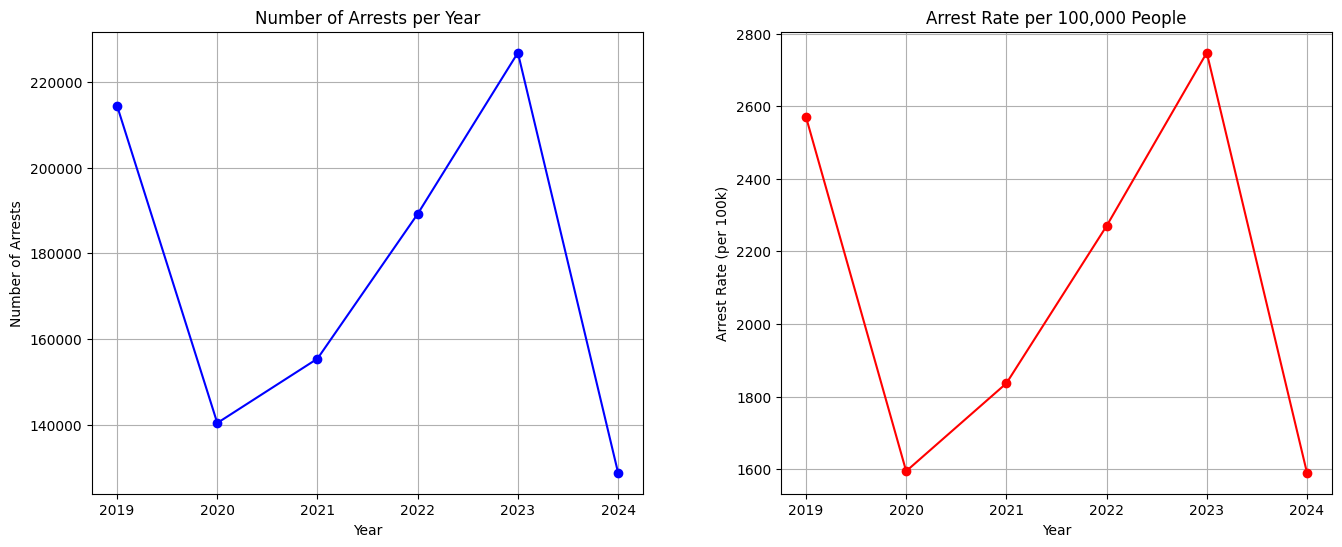

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# Plotting raw number of arrests
plt.subplot(1, 2, 1)
plt.plot(annual_arrests['Year'], annual_arrests['Count'], marker='o', color='blue')
plt.title('Number of Arrests per Year')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.grid(True)

# Plotting arrest rate per 100,000 people
plt.subplot(1, 2, 2)
plt.plot(annual_arrests['Year'], annual_arrests['Arrest Rate (per 100k)'], marker='o', color='red')
plt.title('Arrest Rate per 100,000 People')
plt.xlabel('Year')
plt.ylabel('Arrest Rate (per 100k)')
plt.grid(True)

plt.subplots_adjust(wspace=0.25)
plt.show()

Based on visual inspection, the plots exhibit similar trend in arrest rate over the years. The following observations can be made:

1.   The arrest rate exhibited a significant decline in 2020, likely due to the COVID-19 pandemic and related restrictions. Post-2020, there was a notable increase in arrest numbers, reaching a peak in 2023.
2.   There has been a substantial decrease in arrests in 2024 so far, compared to the previous year, suggesting a likely shift in enforcement patterns or external factors influencing arrest rates.

### 1.a Using Linear Regression Analysis to Assess Trend

 Even with a small dataset, we can use linear regression to determine the overall trend by fitting a line to the data points.

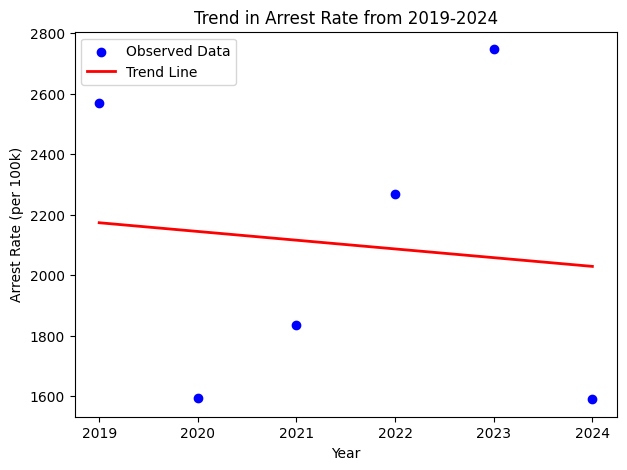

In [20]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = annual_arrests[['Year']].values.reshape(-1, 1)  # Feature: Year
y = annual_arrests['Arrest Rate (per 100k)'].values  # Target: Arrest Rate

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
predicted = model.predict(X)

# Plot the results
plt.figure(figsize=(7, 5))
plt.scatter(X, y, color='blue', label='Observed Data')
plt.plot(X, predicted, color='red', linewidth=2, label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Arrest Rate (per 100k)')
plt.title('Trend in Arrest Rate from 2019-2024')
plt.legend()
plt.show()


In [21]:
slope = model.coef_[0]
print(f"Slope of the regression line: {slope:.4f}")

Slope of the regression line: -28.8679


Based on the linear regression analysis, the slope of the regression line is
-28.8679. This negative slope indicates that, on average, the arrest rate decreased by approximately 28.87 arrests per 100,000 people for each additional year.

## 2. Top 5 Arrests

Aggregating the data to find the top 5 most frequent arrests.

In [22]:
# Group by 'pd_desc' and count occurrences
top_arrests = arrests_df.groupby('PD_DESC').size().reset_index(name='Count')

# Sort by count and get the top 5
top_5_arrests = top_arrests.sort_values(by='Count', ascending=False).head(5)
print("The top 5 most frequent crimes and their counts from 2019-2024")
print(top_5_arrests)


The top 5 most frequent crimes and their counts from 2019-2024
                            PD_DESC   Count
18                        ASSAULT 3  122705
150  LARCENY,PETIT FROM OPEN AREAS,  103575
17         ASSAULT 2,1,UNCLASSIFIED   70396
233  ROBBERY,OPEN AREA UNCLASSIFIED   51845
270  TRAFFIC,UNCLASSIFIED MISDEMEAN   48400


Analyzing the trend of these arrests over time.

In [23]:
top_5_arrest_desc = top_5_arrests['PD_DESC']
top_5_data = arrests_df[arrests_df['PD_DESC'].isin(top_5_arrest_desc)]

In [24]:
# Group by 'Year' and 'PD_DESC' to get counts for each year
annual_top_5_arrests = top_5_data.groupby(['Year', 'PD_DESC']).size().unstack()

In [25]:
annual_top_5_arrests

PD_DESC,"ASSAULT 2,1,UNCLASSIFIED",ASSAULT 3,"LARCENY,PETIT FROM OPEN AREAS,","ROBBERY,OPEN AREA UNCLASSIFIED","TRAFFIC,UNCLASSIFIED MISDEMEAN"
Year,,,,,
2019,11498,24513,21568,9235,13624
2020,10059,17580,11374,7911,4318
2021,11663,19766,13143,7809,4908
2022,13929,22218,20558,9896,6832
2023,15496,24744,23820,11003,11925
2024,7751,13884,13112,5991,6793


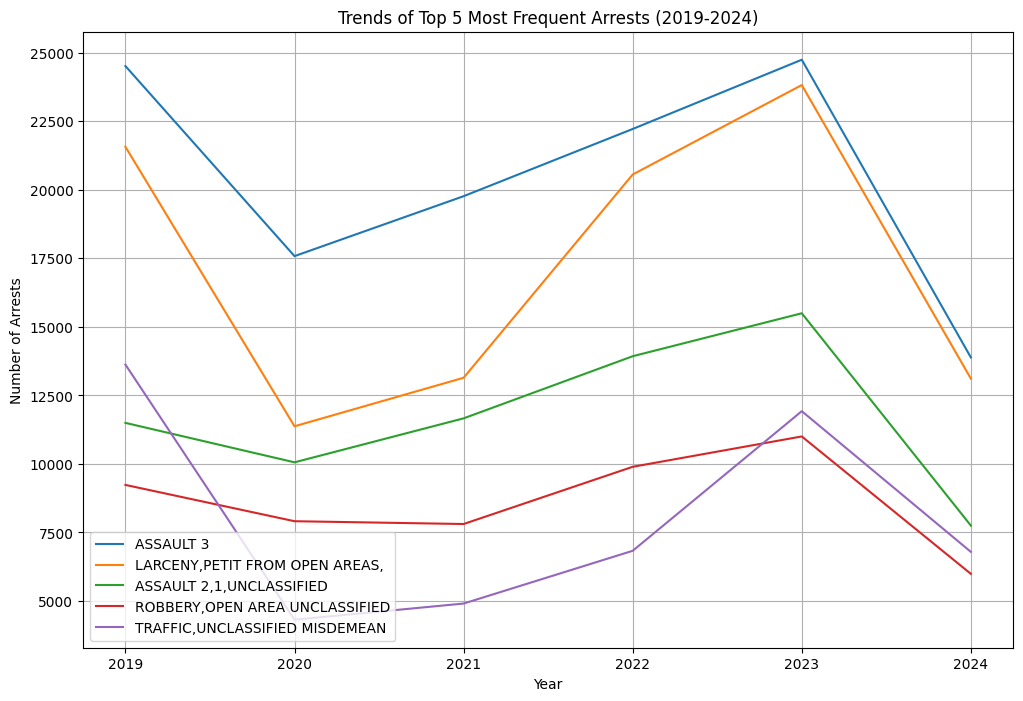

In [26]:
# Plot the trends
plt.figure(figsize=(12, 8))
for arrest in top_5_arrest_desc:
    plt.plot(annual_top_5_arrests.index, annual_top_5_arrests[arrest], label=arrest)

plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.title('Trends of Top 5 Most Frequent Arrests (2019-2024)')
plt.legend()
plt.grid(True)
plt.show()


Across all categories, there's a common pattern of fluctuation. The most frequent arrests typically declined in 2020, rebounded and peaked in 2023, then dropped again in 2024.


## 3. Crime Comparison

In order to compare the arrests between Precinct 19 (Upper East Side) and Precinct 73 (Brownsville), we extract the arrests count for each precinct.

In [27]:
# Extract data for Precinct 19 and Precinct 73
precinct_19 = arrests_df[arrests_df['ARREST_PRECINCT'] == 19]
precinct_73 = arrests_df[arrests_df['ARREST_PRECINCT'] == 73]

# Calculate annual arrests for each precinct
annual_arrests_19 = precinct_19.groupby('Year').size().rename('Count')
annual_arrests_73 = precinct_73.groupby('Year').size().rename('Count')

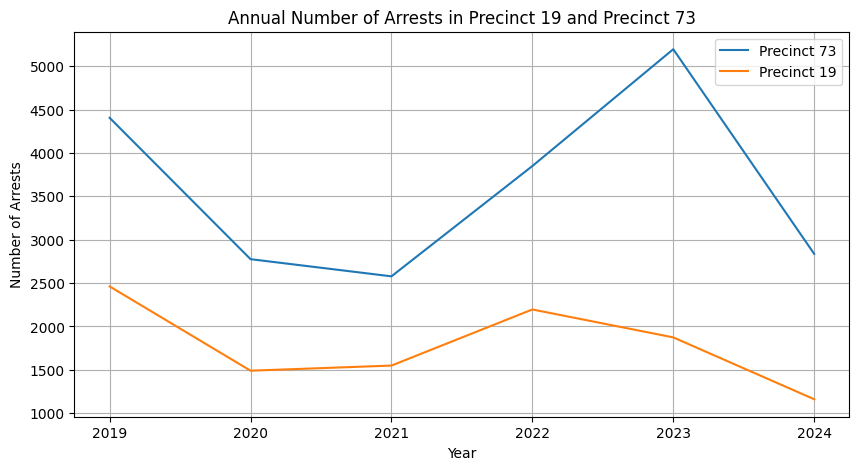

In [28]:
# Visualization
plt.figure(figsize=(10, 5))

plt.plot(annual_arrests_73.index, annual_arrests_73.values, label='Precinct 73')
plt.plot(annual_arrests_19.index, annual_arrests_19.values, label='Precinct 19')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.title('Annual Number of Arrests in Precinct 19 and Precinct 73')
plt.legend()
plt.grid(True)
plt.show()

From the visualization, it is evident that both precincts experienced similar trends in arrests from 2019 to 2022. However, Precinct 73 saw a significant spike in arrests in 2023, whereas Precinct 19 experienced a slight decrease. Over the period from 2019 to 2024, Precinct 73 consistently reported higher arrest numbers compared to Precinct 19.

In order to further compare the crime reported between these two precincts, I'll use the t statistical test to evaluate if there's a significant difference in the arrest counts between Precinct 73 and 19.

Since the t-test assumes a normal distribution to compare the means of two independent samples, I visualize the Q-Q plot of the data and perform Shapiro-Wilk Test to check whether the data significantly deviates from a normal distribution.

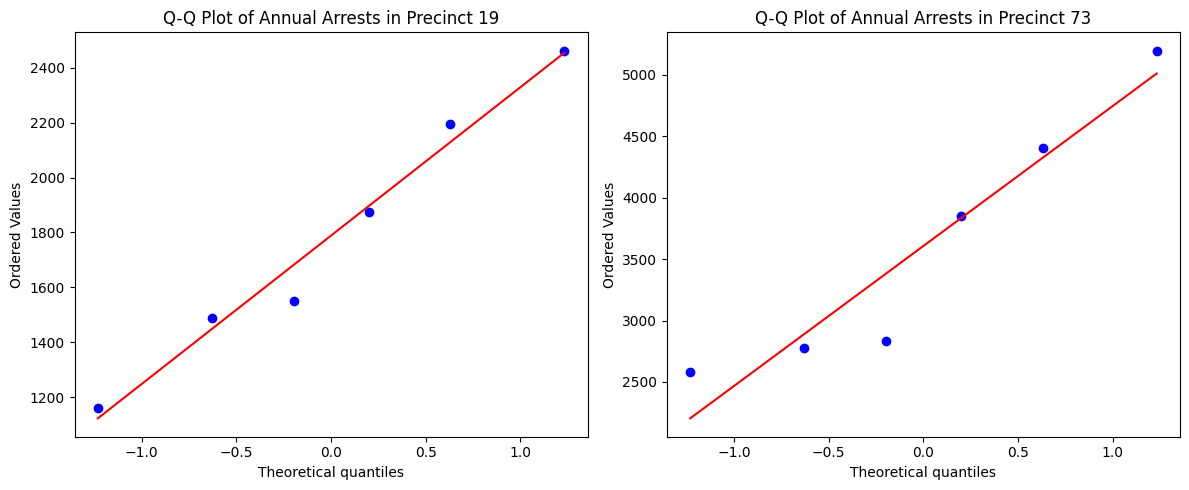

In [29]:
import seaborn as sns
import scipy.stats as stats

# Q-Q plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(annual_arrests_19, dist="norm", plot=plt)
plt.title('Q-Q Plot of Annual Arrests in Precinct 19')

plt.subplot(1, 2, 2)
stats.probplot(annual_arrests_73, dist="norm", plot=plt)
plt.title('Q-Q Plot of Annual Arrests in Precinct 73')

plt.tight_layout()
plt.show()


In [30]:
# Perform the Shapiro-Wilk test for Precinct 19
shapiro_19 = stats.shapiro(annual_arrests_19)
print(f"Shapiro-Wilk Test for Precinct 19: Statistics={shapiro_19.statistic}, p-value={shapiro_19.pvalue}")

# Perform the Shapiro-Wilk test for Precinct 73
shapiro_73 = stats.shapiro(annual_arrests_73)
print(f"Shapiro-Wilk Test for Precinct 73: Statistics={shapiro_73.statistic}, p-value={shapiro_73.pvalue}")


Shapiro-Wilk Test for Precinct 19: Statistics=0.9687880243233873, p-value=0.8841963320330944
Shapiro-Wilk Test for Precinct 73: Statistics=0.8938685295812843, p-value=0.33895555979154146


The p-values for Shapiro-Wilk tests for both the precinct are greater that 0.05. This suggests that the data for Precinct 19 and Precint 73 does not significantly deviate from a normal distribution.

### 3.a T-test for Crime Comparison Between Precinct 19 and 73

We establish the following hypotheses for the t-test:

*   The null hypothesis (H0): There is no significant difference in the mean number of arrests between Precinct 19 and Precinct 73.
*   The alternative hypothesis (HA): There is a significant difference in the mean number of arrests between Precinct 19 and Precinct 73.



In [31]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(annual_arrests_19, annual_arrests_73)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")

T-test: t-statistic = -3.8383421714901367, p-value = 0.0032739375947936295


The t-test results indicate a significant difference between the number of arrests in Precinct 19 and Precinct 73. Specifically observed in the visualization, Precinct 73 has a higher average number of arrests compared to Precinct 19. The p-value of 0.0033 confirms that this difference is statistically significant.

## 4. Future Resource Allocation

Visualizing the number of arrests per precinct on the map. The interactive HTML file 'precinct_arrests.html' is available in the GitHub repo. This file contains a map that visualizes the concentration of arrests in each precinct, with marker sizes proportional to the number of arrests.

In [32]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# Grouping by ARREST_PRECINCT and count the number of arrests
precinct_arrests = arrests_df.groupby('ARREST_PRECINCT').size().reset_index(name='Count')

# Calculating the mean latitude and longitude for each precinct to center the marker
precinct_coords = arrests_df.groupby('ARREST_PRECINCT')[['Latitude', 'Longitude']].mean().reset_index()

# Merging the count and coordinates data
precinct_data = pd.merge(precinct_arrests, precinct_coords, on='ARREST_PRECINCT')

# Normalizing the count for marker size
precinct_data['MarkerSize'] = precinct_data['Count'] / precinct_data['Count'].max() * 25

# Generating a colormap with distinct colors for each precinct
num_precincts = len(precinct_data)
colormap = cm.get_cmap('tab20', num_precincts)

# Initializing the map centered around the average location
m = folium.Map(location=[arrests_df['Latitude'].mean(), arrests_df['Longitude'].mean()], zoom_start=12)

# Adding markers for each precinct with different colors
for i, row in precinct_data.iterrows():
    color = colors.rgb2hex(colormap(i))
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['MarkerSize'],  # Here the size is proportional to the number of arrests
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f'Precinct {int(row["ARREST_PRECINCT"])}: {int(row["Count"])} arrests'
    ).add_to(m)

# Adding a legend for colors and precincts
legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: 400px;
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
     overflow-y: auto;">
     <b>Arrests by Precinct</b><br>
'''
for i, row in precinct_data.iterrows():
    color = colors.rgb2hex(colormap(i))
    legend_html += f'&nbsp;<i class="fa fa-circle" style="color:{color}"></i> Precinct {int(row["ARREST_PRECINCT"])}<br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

#This HTML file is available in the GitHub repo
m.save('precinct_arrests.html')

### 4.a Overview of Arrests by Precinct

In [33]:
precinct_arrests = arrests_df.groupby('ARREST_PRECINCT').size().sort_values(ascending=False)
top_precincts = precinct_arrests.head(5)  # Top 5 precincts
bottom_precincts = precinct_arrests.tail(5)  # Bottom 5 precincts

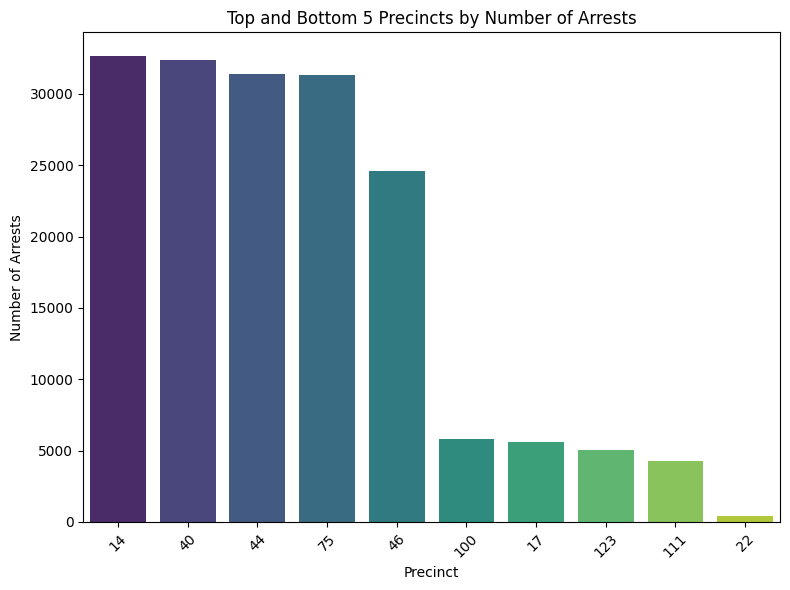

In [34]:
precincts_combined = pd.concat([top_precincts, bottom_precincts])
precincts_combined_sorted = precincts_combined.sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x=precincts_combined_sorted.index.astype(str),  # Ensure indices are treated as strings
    y=precincts_combined_sorted.values,
    palette='viridis'
)
plt.title('Top and Bottom 5 Precincts by Number of Arrests')
plt.xlabel('Precinct')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*   Top Precincts: Precincts 14, 40, 44, 75, and 46 show the highest numbers of arrests, ranging from approximately 24,000 to 32,000 arrests. These precincts may require additional resources such as specialized units, increased patrol presence, and support staff to manage the higher volume of arrests compared to others.

*   Bottom Precincts: Precincts 100, 17, 123, 111, and 22 exhibit much lower arrest frequencies, with counts ranging from about 400 to 5,800. For these units, the NYPD can consider optimizing resource use based on specific needs and crime trends.



###4.b Temporal Analysis of Arrests Made by the NYPD

In [35]:
arrests_df['Month'] = arrests_df['ARREST_DATE'].dt.month
monthly_arrests = arrests_df.groupby(['Year', 'Month']).size().unstack()

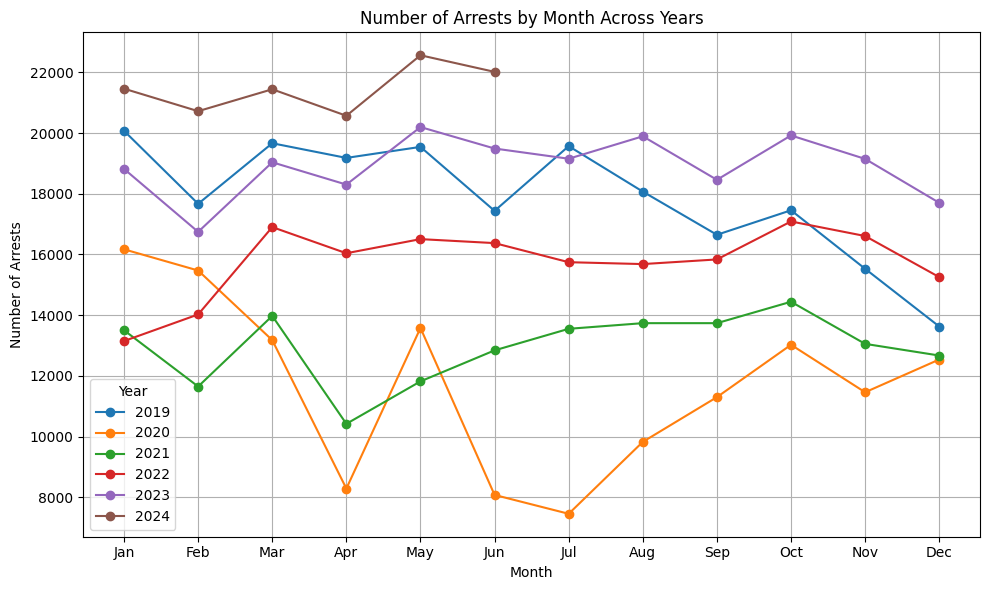

In [36]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot each year as a separate line
for year in monthly_arrests.index:
    plt.plot(monthly_arrests.columns, monthly_arrests.loc[year], marker='o', label=year)

plt.title('Number of Arrests by Month Across Years')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

1.   Seasonal Trends:
Arrests generally peak during spring to summer (April to June) and dip during fall to winter (October to February). This suggests a higher need for resources during spring/summer when arrest volumes are consistently higher.

2.   2024 Arrests: Despite the overall annual arrest numbers for 2024 showing a decline, it’s important to note that this is due to the year being only halfway through. Monthly arrest data for 2024 shows each month's figures surpassing those of previous years.

